In [1]:
! git clone https://github.com/tbmoon/basic_vqa.git

Cloning into 'basic_vqa'...
remote: Enumerating objects: 403, done.
remote: Total 403 (delta 0), reused 0 (delta 0), pack-reused 403
Receiving objects: 100% (403/403), 757.62 KiB | 4.92 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [30]:
!python ./basic_vqa/utils/resize_images.py --input_dir='/Users/sh69/Documents/CS444_Project/CS444-VQA/coco/' --output_dir='../datasets/Resized_Images'  

<DirEntry '.DS_Store'>
Not exist
<DirEntry 'val2017'>
[1000/1250] Resized the images and saved into '../datasets/Resized_Images/val2017'.
<DirEntry 'test2017'>
[1000/1250] Resized the images and saved into '../datasets/Resized_Images/test2017'.
<DirEntry 'train2017'>
[1000/5000] Resized the images and saved into '../datasets/Resized_Images/train2017'.
[2000/5000] Resized the images and saved into '../datasets/Resized_Images/train2017'.
[3000/5000] Resized the images and saved into '../datasets/Resized_Images/train2017'.
[4000/5000] Resized the images and saved into '../datasets/Resized_Images/train2017'.
[5000/5000] Resized the images and saved into '../datasets/Resized_Images/train2017'.


In [13]:

!python ./basic_vqa/utils/make_vacabs_for_questions_answers.py --input_dir='../datasets'

Make vocabulary for questions
The number of total words of questions: 3435
Maximum length of question: 21
Make vocabulary for answers
The number of total words of answers: 9634
Keep top 1000 answers into vocab


In [25]:
!python ./basic_vqa/utils/build_vqa_inputs.py --input_dir='../datasets' --output_dir='../datasets'

building vqa train dataset
processing 10000 / 14693
total 217 out of 14693 answers are <unk>
building vqa val dataset
total 23 out of 1641 answers are <unk>


In [24]:
!python ./basic_vqa/train.py --num_epochs=30 --batch_size=32 --log_dir="./logs_30"

/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skip

/var/folders/h5/qpm9sgm506d94pz2n1wg3m5h0000gp/T/ipykernel_59789/2062169723.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


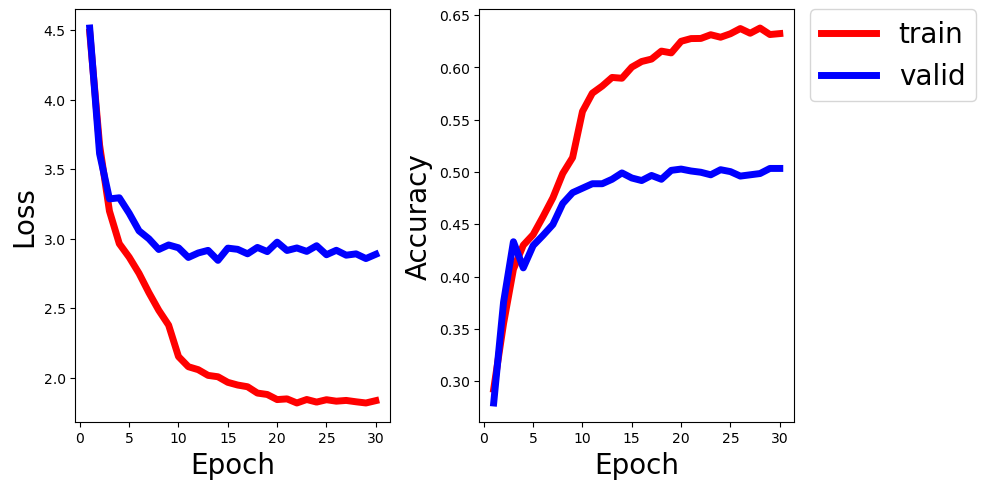

In [29]:
import numpy as np
import csv
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
num_epochs = 30
for phase in ['train', 'valid']:
    
    epoch = []
    loss = []
    acc = []
    
    for i in range(num_epochs):
        
        with open('./logs/{}-log-epoch-{:02d}.txt'.format(phase, i+1), 'r') as f:
            df = csv.reader(f, delimiter='\t')
            data = list(df)

        epoch.append(float(data[0][0]))
        loss.append(float(data[0][1]))
        acc.append(float(data[0][3]))

    plt.subplot(1, 2, 1)
    if phase == 'train':
        plt.plot(epoch, loss, label = phase, color = 'red', linewidth = 5.0)
    else:
        plt.plot(epoch, loss, label = phase, color = 'blue', linewidth = 5.0)
            
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Loss', fontsize = 20)
        
    plt.subplot(1, 2, 2)
    plt.tight_layout()

    if phase == 'train':
        plt.plot(epoch, acc, label = phase, color = 'red', linewidth = 5.0)
    else:
        plt.plot(epoch, acc, label = phase, color = 'blue', linewidth = 5.0)
    
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Accuracy', fontsize = 20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
    
    
plt.savefig('./basic_vqa/png/train.png', dpi = fig.dpi)